In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

boxf = open('boxlist', 'r')

f = open('/home/users/delon/aemulus_nu/tier1_cosmos.txt', 'r')

cols = f.readline().split()[1:]
cols = [col[:-1] for col in cols]
print(cols)
cosmo_params = {}
for line in f:
    assert(len(cols) == len(line.strip().split()))
    cur_vals = dict(zip(cols, np.array(line.strip().split(), dtype=np.float64)))
    cosmo_params[boxf.readline().strip()] = cur_vals
f.close()


f = open('/home/users/delon/aemulus_nu/tier2_cosmos.txt', 'r')

cols = f.readline().split()[1:]
cols = [col[:-1] for col in cols]

print(cols)
for line in f:
    assert(len(cols) == len(line.strip().split()))
    cur_vals = dict(zip(cols, np.array(line.strip().split(), dtype=np.float64)))
    cosmo_params[boxf.readline().strip()] = cur_vals
f.close()

boxf.close()

import pickle

oup_f = open('cosmo_params.pkl', 'wb')
pickle.dump(cosmo_params, oup_f)
oup_f.close()

['As', 'ns', 'H0', 'w0', 'ombh2', 'omch2', 'nu_mass_ev', 'sigma']
['As', 'ns', 'H0', 'w0', 'ombh2', 'omch2', 'nu_mass_ev', 'sigma']


In [3]:
G = 4.3009e-9 #km^2 Mpc/ (Msolar  s^2)

def rhom_a(box, a):
    cosmo_params = pickle.load(open('cosmo_params.pkl', 'rb'))
    print(cosmo_params[box])
    ombh2 = cosmo_params[box]['ombh2']
    omch2 = cosmo_params[box]['omch2']
    H0 = cosmo_params[box]['H0'] #[km s^-1 Mpc-1]
    h = H0/100
    
    Ωm = ombh2/h**2 + omch2/h**2
    ΩΛ = 1 - Ωm
    ρcrit0 = 3*H0**2/(8*np.pi*G) # h^2 Msol/Mpc^3
    
    return Ωm*ρcrit0*(Ωm*a**(-3) + ΩΛ) 
    
    

In [4]:
rhom_a('Box0_1400', .3)

{'As': 1.47405133, 'ns': 1.0094583, 'H0': 59.729599, 'w0': -1.35573566, 'ombh2': 0.0174071, 'omch2': 0.13311985, 'nu_mass_ev': 0.03654721, 'sigma': 0.78017733}


676991481259.3828

In [5]:
box = 'Box0_1400'
Pk_fname = '/oak/stanford/orgs/kipac/users/delon/aemulusnu_massfunction/'+box+'_Pk.pkl'
Pk_f = open(Pk_fname, 'rb')
Pkz = pickle.load(Pk_f)
Pk_f.close()

In [6]:
from utils import *

  0%|          | 0/16 [00:01<?, ?it/s]


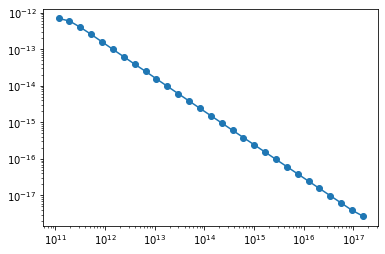

In [8]:
import numpy as np
from scipy.stats import binned_statistic
from tqdm import tqdm
from numpy import gradient

for z in tqdm(Pkz):
    a = redshiftToScale(z)
    edges = np.logspace(np.log10(.9e11), np.log10(2e17), 30, 10.)
    M = np.array([np.sqrt(edges[i]*edges[i+1]) for i in range(len(edges)-1)])
    R = [M_to_R(m, box, a) for m in M]
    sigma2s = [sigma2(Pkz[z], r) for r in R]
    sigma = [np.sqrt(s2) for s2 in sigma2s]
    sigmainv = [s**(-1) for s in sigma]

    dsinvdM = np.gradient(sigmainv, M)
    dlnsinvdM = dsinvdM*sigma
    

    plt.plot(M,dlnsinvdM)
    plt.scatter(M, dlnsinvdM)
    plt.yscale('log')
    plt.xscale('log')
    break
